# Generate style labels and features for houses

In [31]:
import sys  
sys.path.insert(0, '../visual_home_finder')

import imp
import config, paths, utilities

imp.reload(config)
imp.reload(utilities)

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing import image

In [32]:
# Find all the csvs in the folder
#list_of_csvs = paths.list_files(config.LISTINGS_PATH, validExts='.csv')
list_of_csvs = [os.path.sep.join([config.LISTINGS_PATH,'Zip_98105.csv']), 
                os.path.sep.join([config.LISTINGS_PATH,'Zip_98115.csv']),
                os.path.sep.join([config.LISTINGS_PATH,'Zip_98117.csv']),
                os.path.sep.join([config.LISTINGS_PATH,'Zip_98107.csv']),
                os.path.sep.join([config.LISTINGS_PATH,'Zip_98103.csv'])]
# list_of_csvs = [os.path.sep.join([config.LISTINGS_PATH,'Zip_98105.csv'])]
img_mean = config.IMG_MEAN

In [33]:
# Models take a while to load. Only call this once.

# Loading our home-style feature model
home_model = utilities.home_model()

# Get home-style features from the model
home_feature_model = utilities.home_feature_model()

# Also get Resnet features (for comparison)
resnet_model = utilities.resnet50_feature_model()

Processing file ../data/raw/house_listings/Zip_98105.csv...
../data/raw/house_listings/98105_1.jpg


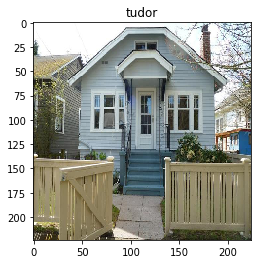

../data/raw/house_listings/98105_2.jpg


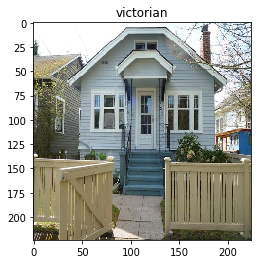

../data/raw/house_listings/98105_3.jpg


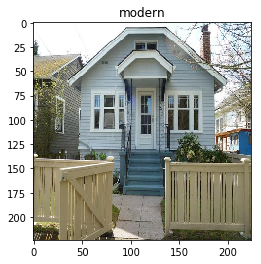

../data/raw/house_listings/98105_4.jpg


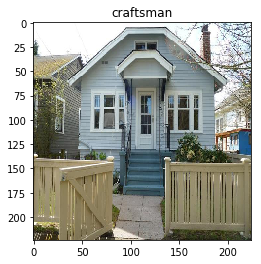

../data/raw/house_listings/98105_5.jpg


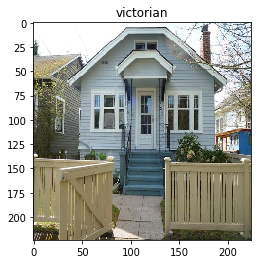

../data/raw/house_listings/98105_6.jpg


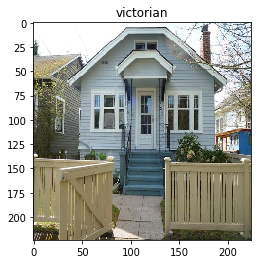

../data/raw/house_listings/98105_7.jpg


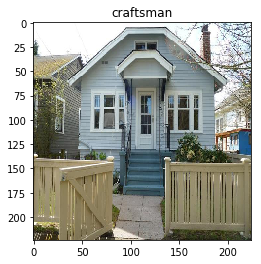

../data/raw/house_listings/98105_8.jpg


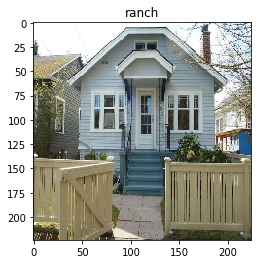

../data/raw/house_listings/98105_9.jpg


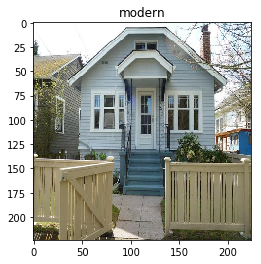

../data/raw/house_listings/98105_10.jpg


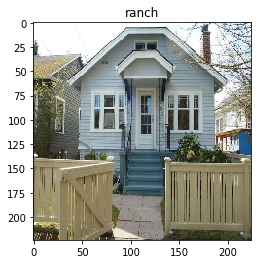

../data/raw/house_listings/98105_11.jpg


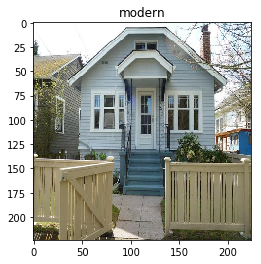

../data/raw/house_listings/98105_12.jpg


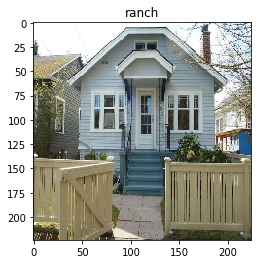

../data/raw/house_listings/98105_13.jpg


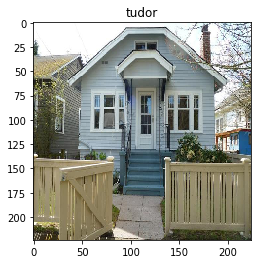

../data/raw/house_listings/98105_14.jpg


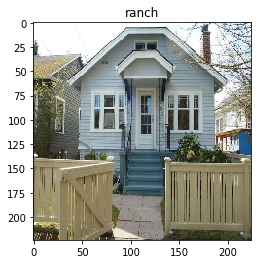

../data/raw/house_listings/98105_15.jpg


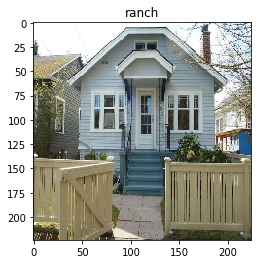

../data/raw/house_listings/98105_16.jpg


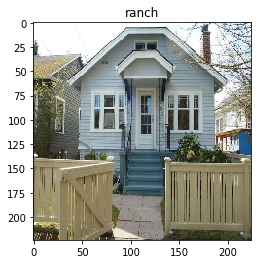

../data/raw/house_listings/98105_17.jpg


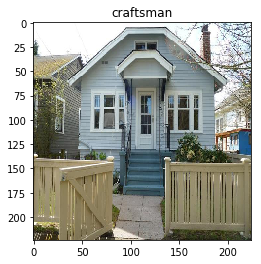

../data/raw/house_listings/98105_18.jpg


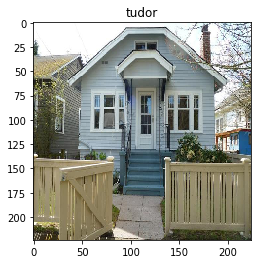

../data/raw/house_listings/98105_19.jpg


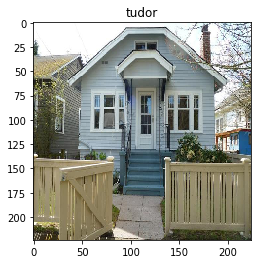

../data/raw/house_listings/98105_20.jpg


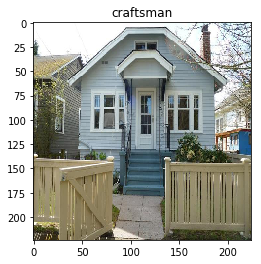

../data/raw/house_listings/98105_21.jpg


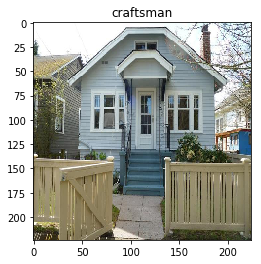

../data/raw/house_listings/98105_22.jpg


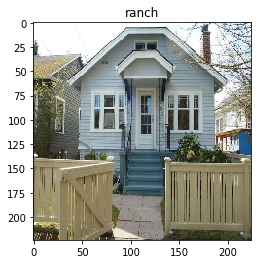

../data/raw/house_listings/98105_23.jpg


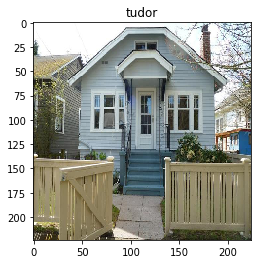

../data/raw/house_listings/98105_24.jpg


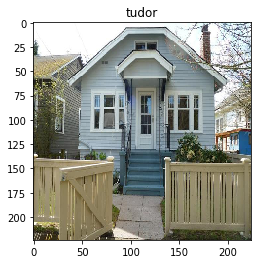

../data/raw/house_listings/98105_25.jpg


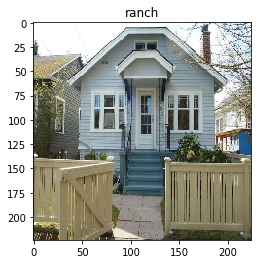

../data/raw/house_listings/98105_26.jpg


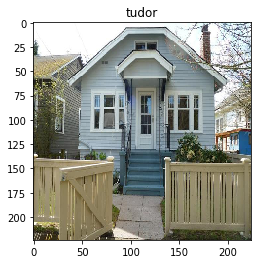

../data/raw/house_listings/98105_27.jpg


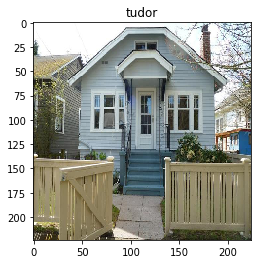

../data/raw/house_listings/98105_28.jpg


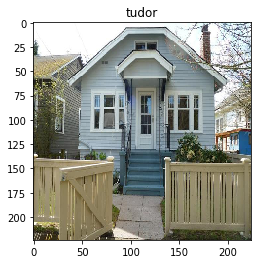

../data/raw/house_listings/98105_29.jpg


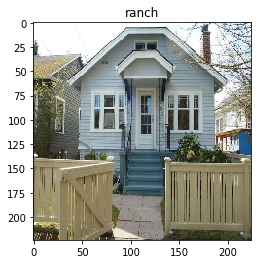

../data/raw/house_listings/98105_30.jpg


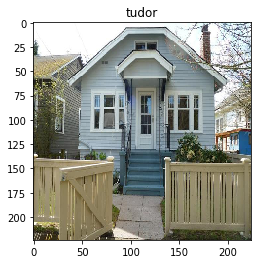

../data/raw/house_listings/98105_31.jpg


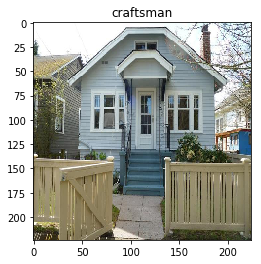

../data/raw/house_listings/98105_32.jpg


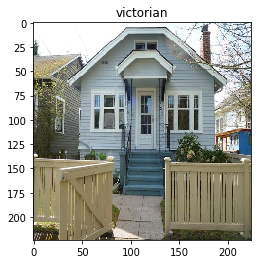

../data/raw/house_listings/98105_33.jpg


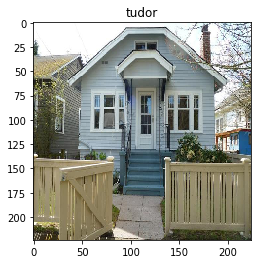

../data/raw/house_listings/98105_34.jpg


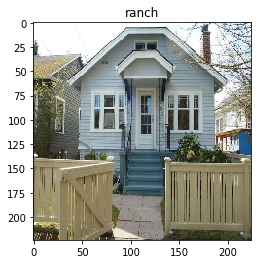

../data/raw/house_listings/98105_35.jpg


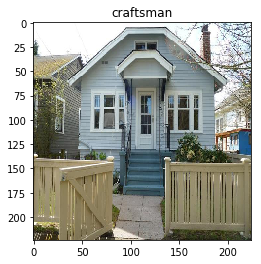

../data/raw/house_listings/98105_36.jpg


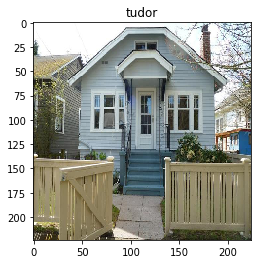

../data/raw/house_listings/98105_37.jpg


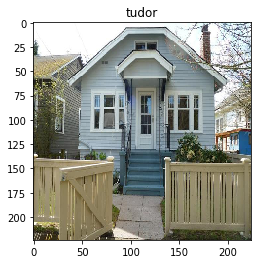

../data/raw/house_listings/98105_38.jpg


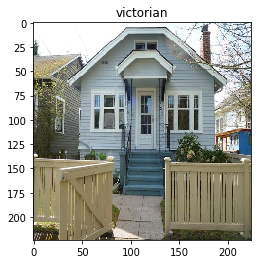

../data/raw/house_listings/98105_39.jpg


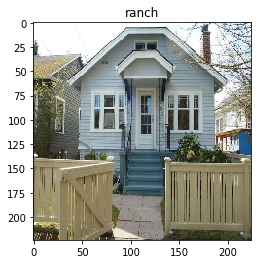

../data/raw/house_listings/98105_40.jpg


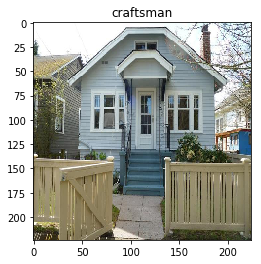

../data/raw/house_listings/98105_41.jpg


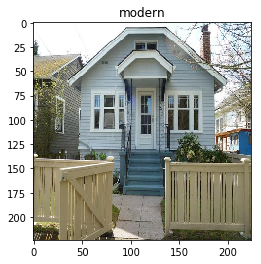

../data/raw/house_listings/98105_42.jpg


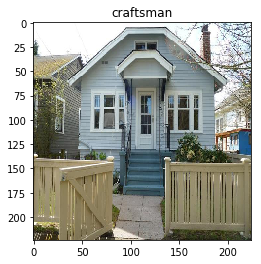

../data/raw/house_listings/98105_43.jpg


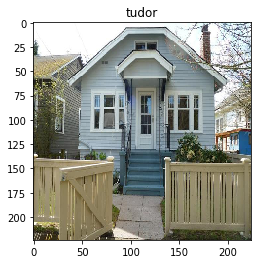

../data/raw/house_listings/98105_44.jpg


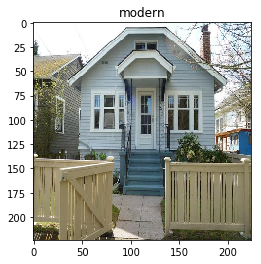

../data/raw/house_listings/98105_45.jpg


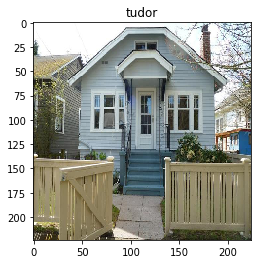

../data/raw/house_listings/98105_46.jpg


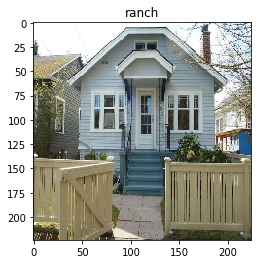

../data/raw/house_listings/98105_47.jpg


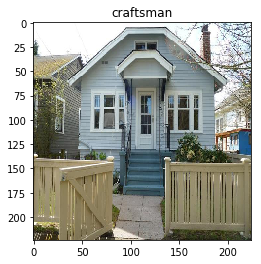

../data/raw/house_listings/98105_48.jpg


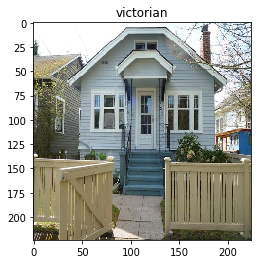

../data/raw/house_listings/98105_49.jpg


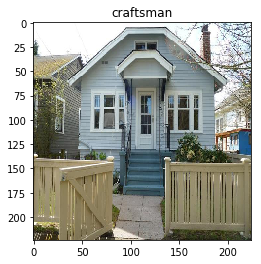

Processing file ../data/raw/house_listings/Zip_98115.csv...


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Processing file ../data/raw/house_listings/Zip_98117.csv...
Processing file ../data/raw/house_listings/Zip_98107.csv...
Processing file ../data/raw/house_listings/Zip_98103.csv...
Processing complete!


In [34]:
# Got thru each of the listings and get appropriate images
home_listings_df = pd.DataFrame()

count = 0
for listings_file in list_of_csvs:
    
    print('Processing file %s...'%(listings_file))
    
    listings_df = pd.read_csv(listings_file)
    index_column = listings_df['ZIP OR POSTAL CODE'].astype(str)+'_'+ (listings_df.index + 1).astype(str)
    listings_df = listings_df.set_index(index_column)
    
    listings_df['predicted_style'] = ""
    listings_df['home_feature'] = ""
    listings_df['resnet_feature'] = ""
    listings_df.home_feature = listings_df.home_feature.astype('object')
    listings_df.resnet_feature = listings_df.resnet_feature.astype('object')
    
    for ii in index_column:
    
        image_name = os.path.sep.join([config.LISTINGS_PATH, ii+'.jpg'])        
        try:
            # Get the home style prediction
            home_style_raw = utilities.get_features_for_image(image_name, home_model)
            img = image.load_img(image_name, target_size = (config.IMAGE_SIZE, config.IMAGE_SIZE))
        except:
            # Remove the particular listing for which image cannot be found
            listings_df = listings_df[listings_df.index != ii]
            print('File %s not found'%image_name)
            continue
        
        house_style = config.CLASSES[np.argmax(np.ravel(home_style_raw))]
        listings_df.at[ii, 'predicted_style'] = house_style
        listings_df.at[ii, 'home_feature'] = \
                        utilities.get_features_for_image(image_name, home_feature_model)
        listings_df.at[ii, 'resnet_feature'] =\
                        utilities.get_features_for_image(image_name, resnet_feature_model)
        
        # Display some classifications
        count += 1
        if count<50:
            img = image.load_img(image_name)
            img = image.img_to_array(img)
            print(image_name)
            plt.imshow(img/255)
            plt.title(house_style)
            plt.show()
    home_listings_df = home_listings_df.append(listings_df)
print('Processing complete!')

In [35]:
np.shape(home_style_raw)

(5,)

In [36]:
home_listings_df.to_csv(os.path.sep.join([config.FEATURE_PATH, 'home_features_model_temp.csv']))

In [37]:
config.MODEL_NAME

'sixth_model_50epochs_5classes_redo.h5'